# Randon Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv(r'C:\Users\rodri\GitHub\My_Projects\1 Aulas Data Science\4 - Machine Learning\Regressao Linear/autompg-dataset.zip')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df = df[df.horsepower != '?']
df.drop('car name', axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['mpg'], axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, #Número de arvores de decisao no nosso modelo
                           random_state=42)
                           
# Fit rf to the training set            
rf.fit(X_train, y_train)                           

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
y_pred = rf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.7950169491525423
MSE: 6.416006644067802
RMSE: 2.5329837433485043


In [25]:
rf.feature_importances_

array([0.17975032, 0.3613554 , 0.12749036, 0.19661222, 0.02309373,
       0.10861014, 0.00308783])

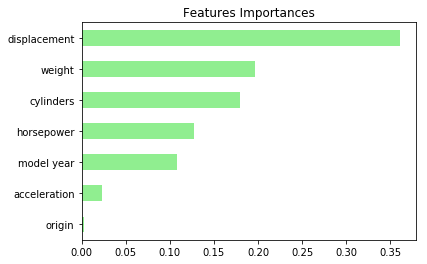

In [26]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()